# Plotting particulate protein degradation and bulk respiration rates in Trocas7 incbubations (April 2019, high water).

## Have BOD (biological oxygen demand) respiration rates for all 24 hr incubations at all four stations.

## Protein degradation rates for 0.3-0.7 um and >0.7 size fractions by Lowry assay

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functools import reduce

In [2]:
cd /home/millieginty/Documents/git-repos/amazon/analyses/T7-incubations/deg-rates/

/home/millieginty/Documents/git-repos/amazon/analyses/T7-incubations/deg-rates


In [3]:
rates = pd.read_csv('deg-rates.csv')

rates.head()

,Station,Bulk,BOD error,0.3-0.7 um,small error p,>0.7 um,large error p,small deg c,small error c,large deg c,large error c
0,Macapa North,0.055,0.005,1.418,0.10,0.338,0.18,0.752,0.14,0.179,0.09
1,Macapa South,0.040,0.004,1.487,0.15,0.384,0.21,0.788,0.24,0.203,0.11
2,Baylique,0.055,0.009,1.016,0.13,2.666,0.32,0.539,0.15,1.413,0.14
3,Chaves,0.048,0.007,0.760,0.09,1.747,0.25,0.403,0.23,0.926,0.16


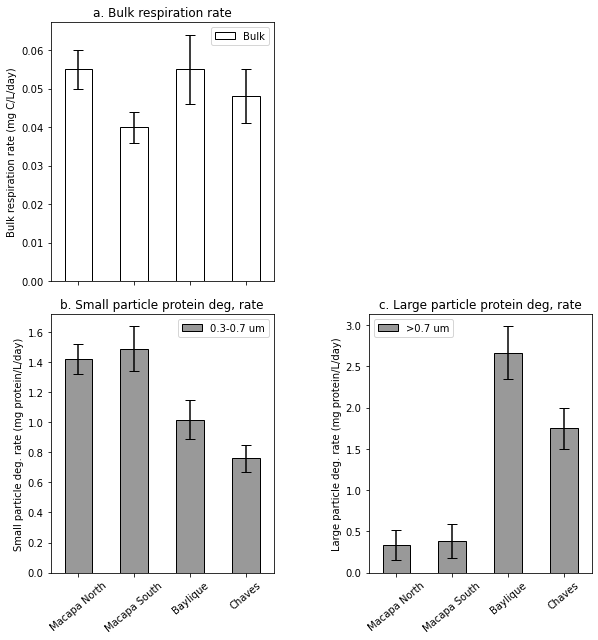

In [12]:
fig, axes = plt.subplots(figsize=(9, 9),nrows=2, ncols=2, sharex = True)
plt.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=3, hspace=0.2)

labels = ['Macapa North', 'Macapa South', 'Baylique', 'Chaves']

# Plot BOD respiration rates with errors
rates.plot.bar(ax = axes[0,0], x='Station', y='Bulk', yerr='BOD error', \
               capsize=5, rot = 45, edgecolor = 'black', color = '#ffffff')
axes[0,0].set_ylabel('Bulk respiration rate (mg C/L/day)')
axes[0,0].set_title('a. Bulk respiration rate')

axes[0,1].set_yticklabels('Bulk', color="white")
axes[0,1].spines['bottom'].set_color('white')
axes[0,1].spines['top'].set_color('white') 
axes[0,1].spines['right'].set_color('white')
axes[0,1].spines['left'].set_color('white')
axes[0,1].tick_params(axis='x', colors='white')
axes[0,1].tick_params(axis='y', colors='white')

# Plot small size fraction degradation
rates.plot.bar(ax = axes[1,0], x='Station', y='0.3-0.7 um', yerr='small error p', \
               capsize=5, rot = 45, edgecolor = 'black', color = '#999999')
axes[1,0].set_ylabel('Small particle deg. rate (mg protein/L/day)')
axes[1,0].set_xlabel('')
axes[1,0].set_xticklabels(labels, rotation = 40)
axes[1,0].set_title('b. Small particle protein deg, rate')

# Plot small size fraction degradation
rates.plot.bar(ax = axes[1,1], x='Station', y='>0.7 um', yerr='large error p', \
               capsize=5, rot = 45, edgecolor = 'black', color = '#999999')
axes[1,1].set_ylabel('Large particle deg. rate (mg protein/L/day)')
axes[1,1].set_xlabel('')
axes[1,1].set_xticklabels(labels, rotation = 40)
axes[1,1].set_title('c. Large particle protein deg, rate')

#axes[0,0].set_title('a) Biological oxygen demand respiration rate', fontsize = 14, loc='left')

plt.tight_layout()
#plt.savefig('protein-deg.png')